<a href="https://colab.research.google.com/github/icculp/holbertonschool-machine_learning/blob/main/pipeline/0x04-data_augmentation/functions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# %tensorflow_version 1.x

In [2]:
import tensorflow.compat.v2 as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

In [3]:
def flip_image(image):
    """ flips the image """
    return tf.image.flip_left_right(image)

In [4]:
tf.compat.v1.enable_eager_execution()
tf.compat.v1.set_random_seed(0)

doggies = tfds.load('stanford_dogs', split='train', as_supervised=True)

Shuffling and writing examples to /root/tensorflow_datasets/stanford_dogs/0.2.0.incompleteAQTY03/stanford_dogs-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/stanford_dogs/0.2.0.incompleteAQTY03/stanford_dogs-test.tfrecord


Dataset stanford_dogs downloaded and prepared to /root/tensorflow_datasets/stanford_dogs/0.2.0. Subsequent calls will reuse this data.


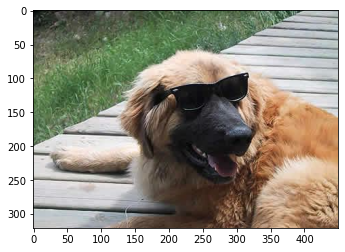

In [5]:
for image, _ in doggies.shuffle(10).take(1):
    plt.imshow(flip_image(image))
    plt.show()

In [6]:
def crop_image(image, size):
    """ flips the image """
    return tf.image.random_crop(
          image, size, seed=None, name=None
)

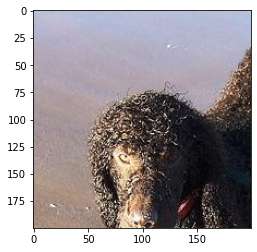

In [7]:
tf.compat.v1.set_random_seed(1)
doggies = tfds.load('stanford_dogs', split='train', as_supervised=True)
for image, _ in doggies.shuffle(10).take(1):
    plt.imshow(crop_image(image, (200, 200, 3)))
    plt.show()

In [8]:

def rotate_image(image):
    """ rotate the image """
    return tf.image.rot90(
    image, k=1, name=None
)

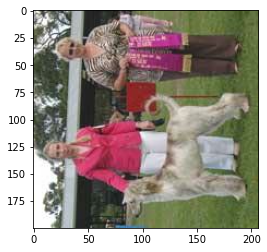

In [9]:
tf.compat.v1.set_random_seed(2)
doggies = tfds.load('stanford_dogs', split='train', as_supervised=True)
for image, _ in doggies.shuffle(10).take(1):
    plt.imshow(rotate_image(image))
    plt.show()

In [10]:
def shear_image(image, intensity):
    """ sheers the image """
    # import tensorflow_addons as tfa
    # return tf.keras.preprocessing.image.array_to_img(
    
    #tf.compat.v1.keras.preprocessing.image.apply_affine_transform(image.numpy(), shear=intensity))
    return tf.keras.preprocessing.image.random_shear(image, intensity)

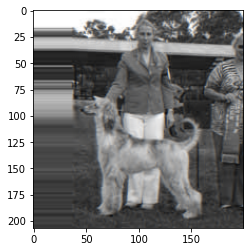

In [11]:
# tf.compat.v1.enable_eager_execution()
tf.compat.v1.set_random_seed(3)

doggies = tfds.load('stanford_dogs', split='train', as_supervised=True)
for image, _ in doggies.shuffle(10).take(1):
    plt.imshow(shear_image(image, 50))
    plt.show()

In [12]:
def change_brightness(image, max_delta):
    """ change brightness of the image """
    return tf.image.adjust_brightness(image, max_delta)


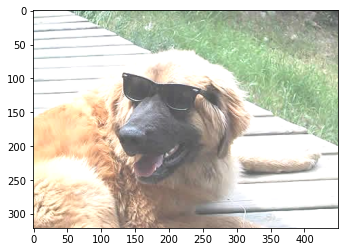

In [13]:
tf.compat.v1.set_random_seed(4)

doggies = tfds.load('stanford_dogs', split='train', as_supervised=True)
for image, _ in doggies.shuffle(10).take(1):
    plt.imshow(change_brightness(image, 0.3))
    plt.show()

In [16]:
def change_hue(image, delta):
    """ change hue of the image """
    return tf.image.adjust_hue(image, delta)


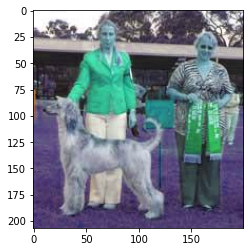

In [17]:
tf.compat.v1.set_random_seed(5)

doggies = tfds.load('stanford_dogs', split='train', as_supervised=True)
for image, _ in doggies.shuffle(10).take(1):
    plt.imshow(change_hue(image, -0.5))
    plt.show()

In [20]:
import numpy as np

In [52]:
def pca_color(image, alphas):
    """ perform PCA color change as in AlexNet """
    orig_image = image.numpy().astype(float).copy()

    image = image.numpy().astype(float) / 255.0  # rescale to 0 to 1 range

    # flatten image to columns of RGB
    image_rs = image.reshape(-1, 3)
    # image_rs shape (640000, 3)

    # center mean
    image_centered = image_rs - np.mean(image_rs, axis=0)

    # paper says 3x3 covariance matrix
    image_cov = np.cov(image_centered, rowvar=False)

    # eigen values and eigen vectors
    eig_vals, eig_vecs = np.linalg.eigh(image_cov)

    # sort values and vector
    sort_perm = eig_vals[::-1].argsort()
    eig_vals[::-1].sort()
    eig_vecs = eig_vecs[:, sort_perm]

    # get [p1, p2, p3]
    m1 = np.column_stack((eig_vecs))

    # 3x1 matrix of eigen values multiplied by random variable draw from normal
    # distribution with mean of 0 and standard deviation of 0.1
    m2 = np.zeros((3, 1))
    # according to the paper alpha should only be draw once per augmentation
    # (not once per channel)

    # broad cast to speed things up
    m2[:, 0] = alphas * eig_vals[:]

    # this is the vector that we're going to add to each pixel in a moment
    add_vect = np.matrix(m1) * np.matrix(m2)

    for idx in range(3):   # RGB
        orig_image[..., idx] += add_vect[idx]

    # for image processing it was found that working with float 0.0 to 1.0
    # was easier than integers between 0-255
    # orig_image /= 255.0
    orig_image = np.clip(orig_image, 0.0, 255.0)

    # orig_image *= 255
    orig_image = orig_image.astype(np.uint8)

    return orig_image

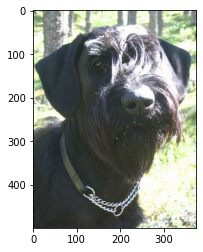

In [53]:
tf.compat.v1.set_random_seed(100)
np.random.seed(100)
doggies = tfds.load('stanford_dogs', split='train', as_supervised=True)
for image, _ in doggies.shuffle(10).take(1):
    alphas = np.random.normal(0, 0.1, 3)
    # import fancy_pca
    plt.imshow(pca_color(image, alphas))
    plt.show()